In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import glob

import insightface
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image


In [2]:
print('insightface', insightface.__version__)
print('numpy', np.__version__)

insightface 0.7.3
numpy 1.24.3


## Step 1. Detect faces


In [3]:
app = FaceAnalysis(name='buffalo_l')
app.prepare(ctx_id=0, det_size=(640,640))

c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\onnxruntime\capi\onnxruntime_inference_collection.py:65: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\Owner/.insightface\models\buffalo_l\1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\Owner/.insightface\models\buffalo_l\2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\Owner/.insightface\models\buffalo_l\det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\Owner/.insightface\models\buffalo_l\genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\Owner/.insightface\models\buffalo_l\w600k_r50.onnx recognition ['None', 3, 112, 112] 127.

In [22]:
img=ins_get_image('t1')
# img= plt.imread('OIP.jpg')

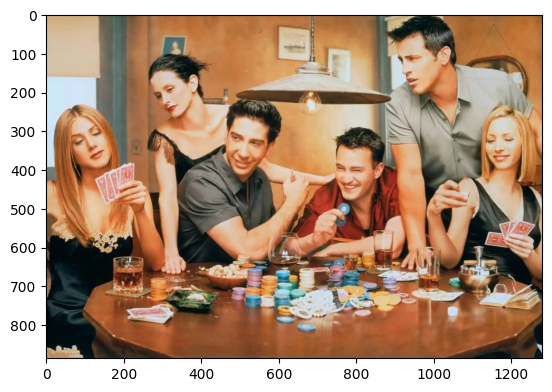

In [23]:
plt.imshow(img[:,:,::-1])
# plt.imshow(img)
plt.show()

In [24]:
faces = app.get(img)

In [16]:
# faces returns a dictionary that includes information for each face found in the image
faces

[{'bbox': array([345.0482  ,  29.822124, 371.79642 ,  63.73439 ], dtype=float32),
  'kps': array([[352.5328  ,  42.347427],
         [364.9925  ,  42.095284],
         [359.43146 ,  48.500683],
         [353.0521  ,  53.551605],
         [364.63208 ,  53.3654  ]], dtype=float32),
  'det_score': 0.907511,
  'landmark_3d_68': array([[ 3.4287170e+02,  4.1069626e+01,  2.1496325e+01],
         [ 3.4346902e+02,  4.5034245e+01,  2.1427805e+01],
         [ 3.4409390e+02,  4.9150822e+01,  2.1041178e+01],
         [ 3.4490106e+02,  5.3190731e+01,  1.9782827e+01],
         [ 3.4624271e+02,  5.6946625e+01,  1.6939974e+01],
         [ 3.4829434e+02,  5.9745255e+01,  1.4566631e+01],
         [ 3.5065735e+02,  6.1642967e+01,  1.2414595e+01],
         [ 3.5360034e+02,  6.2746925e+01,  9.3946037e+00],
         [ 3.5804791e+02,  6.3657211e+01,  7.9226742e+00],
         [ 3.6227234e+02,  6.2950062e+01,  9.9495506e+00],
         [ 3.6541183e+02,  6.1636997e+01,  1.3548514e+01],
         [ 3.6787979e+02,  

In [25]:
# print the number of faces found
len(faces)

6

In [26]:
# what are the keys in a image?
faces[0].keys()

dict_keys(['bbox', 'kps', 'det_score', 'landmark_3d_68', 'pose', 'landmark_2d_106', 'gender', 'age', 'embedding'])

## Crop and plot faces

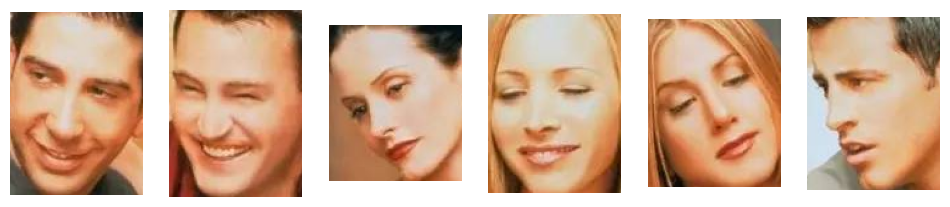

In [29]:
# plotting the faces in the image. The were six found in the example t1 image file
img = ins_get_image('t1')
# img= plt.imread('OIP.jpg')
fig, axs = plt.subplots(1,6, figsize=(12,5))

for i, face in enumerate(faces):
    bbox = face['bbox']
    bbox = [int(b) for b in bbox] #convert bounding boxes coord to integer coordinates
    axs[i].imshow(img[bbox[1]:bbox[3],bbox[0]:bbox[2],::-1])
    # axs[i].imshow(img[bbox[1]:bbox[3],bbox[0]:bbox[2]])
    axs[i].axis('off')

## Step 2. Face Swapping

In [30]:
# download the inswapper_128.onnx swapping model put it under ~/.insightface/models/buffalo_l
swapper = insightface.model_zoo.get_model('inswapper_128.onnx', download=False, download_zip=False)

c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\onnxruntime\capi\onnxruntime_inference_collection.py:65: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
inswapper-shape: [1, 3, 128, 128]


In [35]:
# Sorts left to right
faces = sorted(faces, key = lambda x : x.bbox[0])
res = img.copy()
assert len(faces)==6 # Confirm 6 faces found
source_face = faces[2]

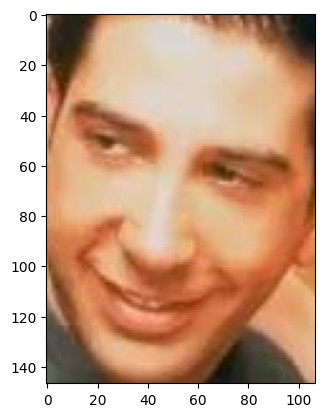

In [37]:
bbox = source_face['bbox']
bbox = [int(b) for b in bbox]
plt.imshow(img[bbox[1]:bbox[3],bbox[0]:bbox[2],::-1])
plt.show()

In [38]:
for face in faces:
    res = swapper.get(res, face, source_face, paste_back=True)

## Plot the swapped faces

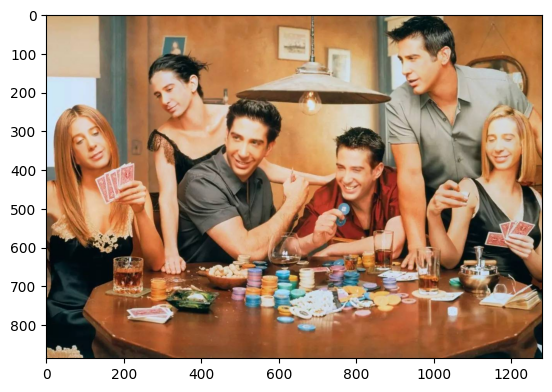

In [39]:
plt.imshow(res[:,:,::-1])
plt.show()

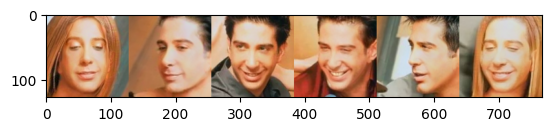

In [40]:
res = []
for face in faces:
    _img, _ = swapper.get(img, face, source_face, paste_back=False)
    res.append(_img)
res = np.concatenate(res, axis=1)

plt.imshow(res[:,:,::-1])
plt.show()